In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_samples, silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import math
%matplotlib inline
   
import warnings
warnings.filterwarnings("ignore")
#Please ignore the warnings with version change

from google.colab import drive
drive.mount("/content/drive")
#Change current working directory to gdrive
%cd /gdrive
%matplotlib inline


Mounted at /content/drive
[Errno 2] No such file or directory: '/gdrive'
/content


In [ ]:
#Loading the data
trainfile = r'/content/drive/MyDrive/CIS508/Assignment_4/CC GENERAL.csv'
trainData = pd.read_csv(trainfile) #creates a dataframe

print(trainData.shape)

(8950, 18)


# **Credit card user clustering**

**EDA**

In [ ]:
#dataset copy
data=trainData.copy()

In [ ]:
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
print(data.isnull().sum().sort_values(ascending=False))

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
CUST_ID                               0
dtype: int64


In [ ]:
data.head()
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Pre-processing**

In [ ]:
#Drop ID
data=data.drop('CUST_ID', axis= 1)

In [ ]:
#Drop NaN Features 
data=data.dropna()

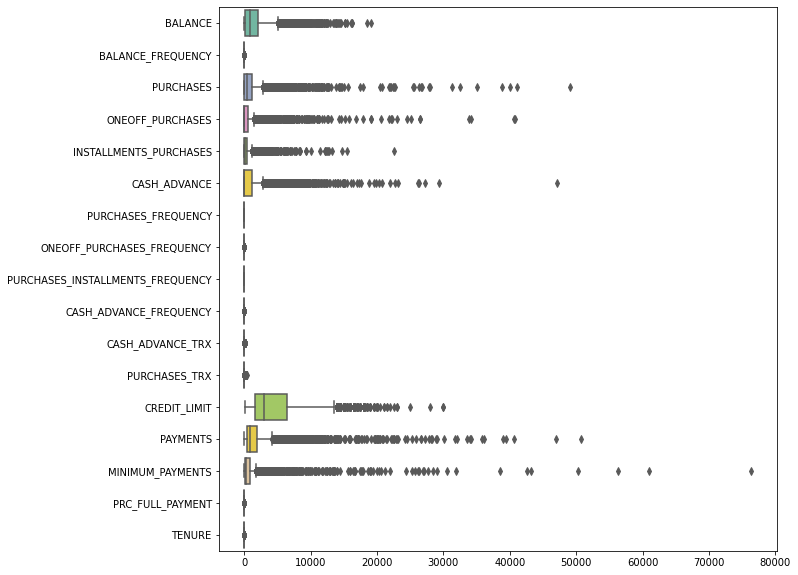

In [ ]:
#Outliere check
plt.figure(figsize = (10,10))
sns.boxplot(data=data, orient = 'h', palette = 'Set2')

In [ ]:
#Remove Extream Outlier
Q1 = data.quantile(0.25) 
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outlier = (data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))
outlier = outlier.any(axis=1)
search_df = data[outlier]

print(search_df)

data = data.drop(search_df.index, axis=0)
print(data.shape)

          BALANCE  BALANCE_FREQUENCY  ...  PRC_FULL_PAYMENT  TENURE
1     3202.467416           0.909091  ...          0.222222      12
2     2495.148862           1.000000  ...          0.000000      12
5     1809.828751           1.000000  ...          0.000000      12
6      627.260806           1.000000  ...          1.000000      12
9      152.225975           0.545455  ...          0.000000      12
...           ...                ...  ...               ...     ...
8943     5.871712           0.500000  ...          0.000000       6
8945    28.493517           1.000000  ...          0.500000       6
8947    23.398673           0.833333  ...          0.250000       6
8948    13.457564           0.833333  ...          0.250000       6
8949   372.708075           0.666667  ...          0.000000       6

[5685 rows x 17 columns]
(2951, 17)


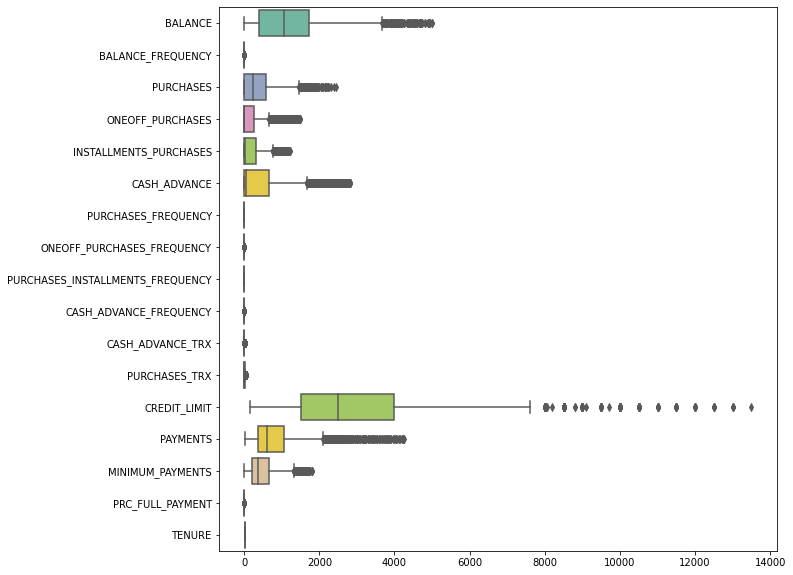

In [ ]:
#Outliere check after pre-processeing 
plt.figure(figsize = (10,10))
sns.boxplot(data=data, orient = 'h', palette = 'Set2')

**Modelling**

K-Means model development

In [ ]:
df=data.copy()

In [ ]:
#K-Means Clustering ========================================================================
#Default Mode - K=8
kmeans = KMeans()
kmeans.fit(df)
print(kmeans.labels_)
Print Silhouette measure
print(silhouette_score(df, kmeans.labels_, random_state=1))
df['cluster'] = kmeans.labels_


[1 1 4 ... 1 1 1]
0.3027689794711533


In [ ]:
sil_score = []
for i in range(2,11):
    k_means = KMeans(n_clusters = i,random_state = 0)
    k_means.fit(df)
    labels = k_means.labels_
    score = silhouette_score(df,labels, random_state = 0)
    sil_score.append(score)
    print(f"The Silhouette Score of {i} clusters : {score}")

The Silhouette Score of 2 clusters : 0.5339577589433048
The Silhouette Score of 3 clusters : 0.34439765410987816
The Silhouette Score of 4 clusters : 0.3687966551165767
The Silhouette Score of 5 clusters : 0.2940234146204549
The Silhouette Score of 6 clusters : 0.3001359318257396
The Silhouette Score of 7 clusters : 0.3079885255303271
The Silhouette Score of 8 clusters : 0.3052031657261214
The Silhouette Score of 9 clusters : 0.2351305373318892
The Silhouette Score of 10 clusters : 0.2227897126350015


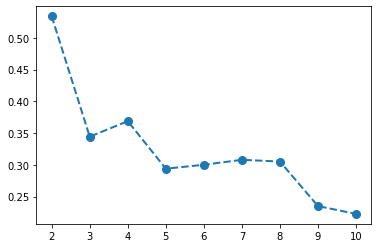

In [ ]:
plt.plot(range(2,11),sil_score, marker='o', linestyle='dashed',
...      linewidth=2, markersize=8);

Hyperparameter Tunning for Kmeans

In [ ]:
sil_score = []
for i in ("k-means++", "random"):
    k_means = KMeans(n_clusters = 4,random_state = 0,init=i)
    k_means.fit(df)
    labels = k_means.labels_
    score = silhouette_score(df,labels, random_state = 0)
    sil_score.append(score)
    print(f"The Silhouette Score of {i} clusters : {score}")

The Silhouette Score of k-means++ clusters : 0.3687966551165767
The Silhouette Score of random clusters : 0.36914475800641555


In [ ]:
sil_score = []
for i in ("auto", "full", "elkan"):
    k_means = KMeans(n_clusters = 4,random_state = 0, algorithm=i)
    k_means.fit(df)
    labels = k_means.labels_
    score = silhouette_score(df,labels, random_state = 0)
    sil_score.append(score)
    print(f"The Silhouette Score of {i} clusters : {score}")

The Silhouette Score of auto clusters : 0.3687966551165767
The Silhouette Score of full clusters : 0.3687966551165767
The Silhouette Score of elkan clusters : 0.3687966551165767


In [ ]:
sil_score = []
for i in range(2,30):
    k_means = KMeans(n_clusters = 4,random_state = 0, n_init=i)
    k_means.fit(df)
    labels = k_means.labels_
    score = silhouette_score(df,labels, random_state = 0)
    sil_score.append(score)
    print(f"The Silhouette Score of {i} clusters : {score}")

The Silhouette Score of 2 clusters : 0.36498055917171063
The Silhouette Score of 3 clusters : 0.36498055917171063
The Silhouette Score of 4 clusters : 0.36498055917171063
The Silhouette Score of 5 clusters : 0.36498055917171063
The Silhouette Score of 6 clusters : 0.36498055917171063
The Silhouette Score of 7 clusters : 0.3687966551165767
The Silhouette Score of 8 clusters : 0.3687966551165767
The Silhouette Score of 9 clusters : 0.3687966551165767
The Silhouette Score of 10 clusters : 0.3687966551165767
The Silhouette Score of 11 clusters : 0.3687966551165767
The Silhouette Score of 12 clusters : 0.3687966551165767
The Silhouette Score of 13 clusters : 0.3687966551165767
The Silhouette Score of 14 clusters : 0.3687966551165767
The Silhouette Score of 15 clusters : 0.3687966551165767
The Silhouette Score of 16 clusters : 0.3687966551165767
The Silhouette Score of 17 clusters : 0.3687966551165767
The Silhouette Score of 18 clusters : 0.3687966551165767
The Silhouette Score of 19 cluster

In [ ]:
#Final model
k_means = KMeans(n_clusters = 4,random_state = 0, init="random", n_init=10)
k_means.fit(df)
labels=k_means.labels_
df['cluster']=labels
score = silhouette_score(df,labels, random_state = 0)
sil_score.append(score)
print(f"The Silhouette Score of {i} clusters : {score}")


The Silhouette Score of 29 clusters : 0.3691452853520948


**Cluster Characteristics review**

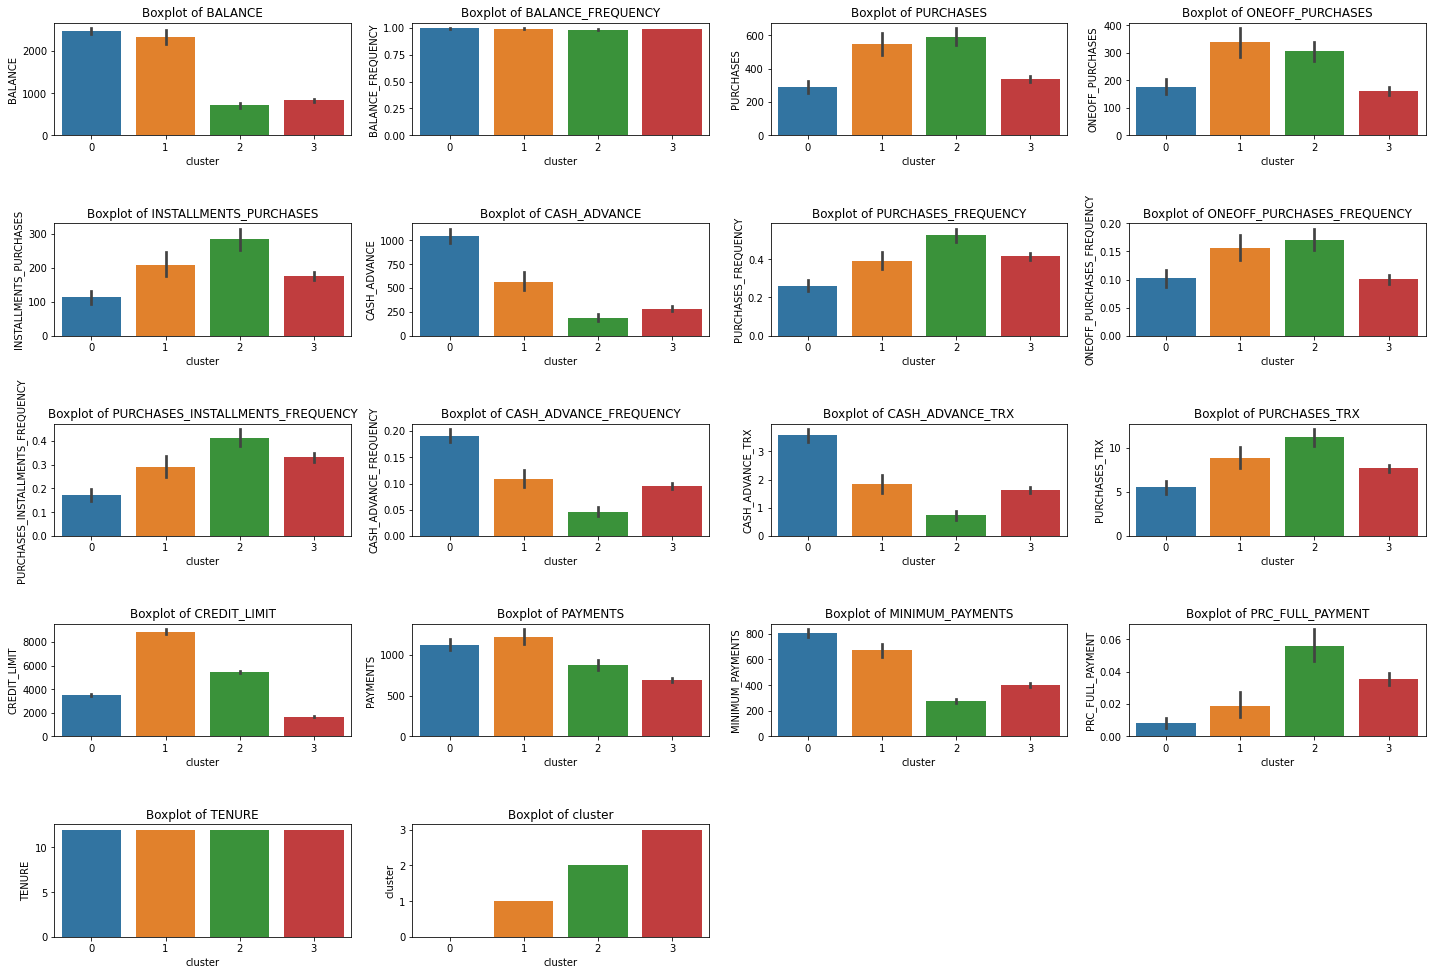

In [ ]:
plt.figure(figsize = (20,16))
Features = df.columns
for i in range(len(Features)):
    plt.subplot(6,4, i + 1)
    sns.barplot(x = 'cluster', y = df[Features[i]], data = df)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

In [ ]:
#save as csv file
export_csv = df.to_csv(r'/content/drive/MyDrive/CIS508/Assignment_4/result/df_Credit_card.csv')

**Addtional Medle Experience : Visuallization**

In [ ]:
#Additional Data Preprosseing for Data Visuallization

#Data Scaling
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(df)
df=pd.DataFrame(scaler.transform(df),columns=df.columns)

#PCA (Principle Component Analysis) 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df)
df= pd.DataFrame(pca.transform(df), columns=(["col1","col2"]))

#Final model
k_means = KMeans(n_clusters = 4,random_state = 0, init="random", n_init=10)
k_means.fit(df)

#saving pca data for vc
df_pca=df.copy()
df_pca['cluster']=k_means.labels_

#merging cluster column with orginal data
df_pca['cluster']=k_means.labels_
df=df_pca

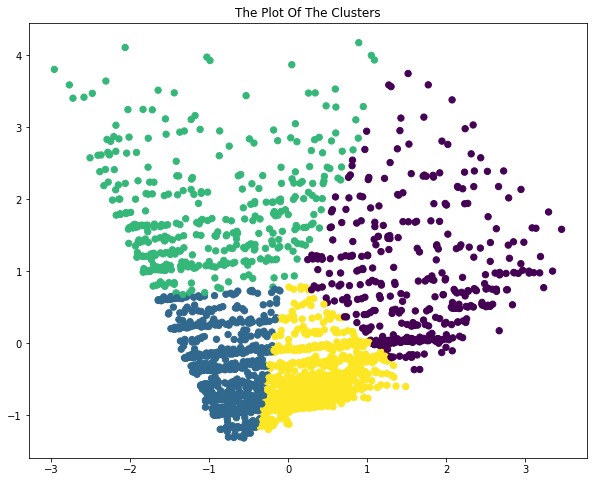

In [ ]:
x = df['col1']
y = df['col2']

fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=df['cluster'], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()